# Clutter detection using polarimetric approach (EDGE netcdf)

In [1]:
%pylab inline
import numpy as np
import pylab as pl
import wradlib as wrl

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


## Example 1: Clear Air conditions

### Read the data

The data used in this notebook are netcdf files generated by the EEC-EDGE software for polarimetric radar. The required data are:
1. Specific differential phase (phi)
2. Differential Reflectivity (zdr)
3. Cross-correlation coefficient (rho)
4. Velocity (v)
5. Reflectivity (z)
6. Static clutter map (cmap)


#### Clear Air conditions

First we look at the case when there is known to be no rain. Returns detected at this time is expected to be from non-meteorological origins.

In [2]:
# read data
# clear air conditions (CA)
data_phi_CA, attrs_phi_CA = wrl.io.read_EDGE_netcdf('../phirad-data/radars/tagaytay/TAG-20120411-013431-02-P.nc')
data_zdr_CA, attrs_zdr_CA = wrl.io.read_EDGE_netcdf('../phirad-data/radars/tagaytay/TAG-20120411-013431-02-D.nc')
data_rho_CA, attrs_rho_CA = wrl.io.read_EDGE_netcdf('../phirad-data/radars/tagaytay/TAG-20120411-013431-02-R.nc')
data_v_CA, attrs_v_CA = wrl.io.read_EDGE_netcdf('../phirad-data/radars/tagaytay/TAG-20120411-013431-02-V.nc')
data_z_CA, attrs_z_CA = wrl.io.read_EDGE_netcdf('../phirad-data/radars/tagaytay/TAG-20120411-013431-02-Z.nc')

For the echo classification, a previously-generated static clutter map is also required.

In [3]:
# read static clutter map
cmap, attrs_cmap = wrl.io.from_hdf5('../phirad-data/cluttermask/TAG_cmask.hdf5')

A dictionary with a specific set of keys is required for the fuzzy echo classification function. Create a dictionary and place the data.

In [4]:
# place in a dictionary
dat_CA = {}
dat_CA["phi"] = data_phi_CA
dat_CA["zdr"] = data_zdr_CA
dat_CA["rho"] = data_rho_CA
dat_CA["dop"] = data_v_CA
dat_CA["map"] = cmap

### Identify the clutter

The fuzzy echo classification is based on the approach presented by [Vulpiani _et al._ (2012)](http://journals.ametsoc.org/doi/abs/10.1175/JAMC-D-10-05024.1]) and has been implemented in _wradlib_ function `clutter.classify_echo_fuzzy`

In [5]:
# identify clutter
clutter_CA, nanmask_CA = wrl.clutter.classify_echo_fuzzy(dat_CA, thresh=0.5)

### Plot the results

First we plot the resulting clutter map.

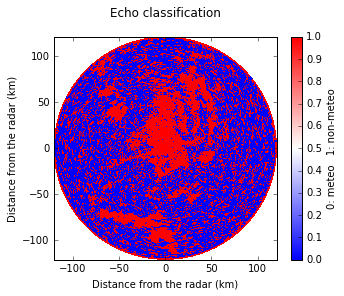

In [6]:
pl.figure(figsize=(5,5))
ax,pm = wrl.vis.plot_ppi(np.ma.masked_invalid(clutter_CA[0]), r=attrs_z_CA['r']/1000., 
                         cmap=pl.cm.bwr)
cb = pl.colorbar(pm, shrink=0.8)
cb.set_label('0: meteo   1: non-meteo')
pl.xlim((-121,121))
pl.ylim((-121,121))
pl.xlabel('Distance from the radar (km)')
pl.ylabel('Distance from the radar (km)')
pl.title('Echo classification\n')

Not everything that was retrieved in the other variables are also retrieved in the reflectivity data. Let us take a look at how the reflectivity data looks like.

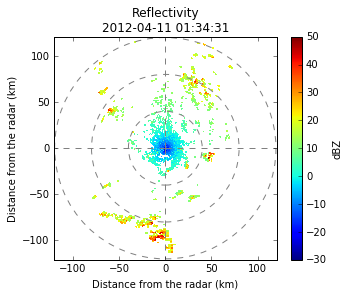

In [7]:
pl.figure(figsize=(5,5))
ax,pm = wrl.vis.plot_ppi(np.ma.masked_invalid(data_z_CA), r=attrs_z_CA['r']/1000., vmin=-30, vmax=50)
wrl.vis.plot_ppi_crosshair(site=(0,0),ranges=[40,80,120])
cb = pl.colorbar(pm, shrink=0.8)
cb.set_label('dBZ')
pl.xlim((-121,121))
pl.ylim((-121,121))
pl.xlabel('Distance from the radar (km)')
pl.ylabel('Distance from the radar (km)')
pl.title('Reflectivity\n' + str(attrs_z_CA['time']))

#### Masking to reflectivity data

The clutter map can be masked to the reflectivity data.

In [8]:
# masking the clutter with reflectivity data
mask_CA = np.isnan(data_z_CA)
clutter_masked_CA = np.ma.masked_array(clutter_CA[0], mask=mask_CA)

Then we can plot again. Here we see that all the reflectivity measured are from non-meteorological origins.

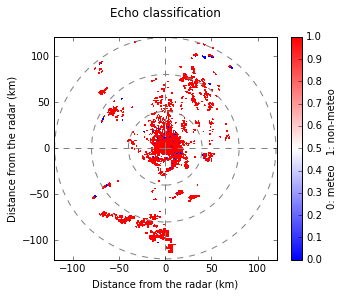

In [9]:
pl.figure(figsize=(5,5))
ax,pm = wrl.vis.plot_ppi(np.ma.masked_invalid(clutter_masked_CA), r=attrs_z_CA['r']/1000., 
                         cmap=pl.cm.bwr)
wrl.vis.plot_ppi_crosshair(site=(0,0),ranges=[40,80,120])
cb = pl.colorbar(pm, shrink=0.8)
cb.set_label('0: meteo   1: non-meteo')
pl.xlim((-121,121))
pl.ylim((-121,121))
pl.xlabel('Distance from the radar (km)')
pl.ylabel('Distance from the radar (km)')
pl.title('Echo classification\n')

## Example 2: Rainfall Condition

Now we do everything again, this time using data from rainfall conditions.

In [10]:
# rainfall conditions (RF)
# read the data
data_phi_RF, attrs_phi_RF = wrl.io.read_EDGE_netcdf('../phirad-data/radars/tagaytay/TAG-20120806-131547-02-P.nc')
data_zdr_RF, attrs_zdr_RF = wrl.io.read_EDGE_netcdf('../phirad-data/radars/tagaytay/TAG-20120806-131547-02-D.nc')
data_rho_RF, attrs_rho_RF = wrl.io.read_EDGE_netcdf('../phirad-data/radars/tagaytay/TAG-20120806-131547-02-R.nc')
data_v_RF, attrs_v_RF = wrl.io.read_EDGE_netcdf('../phirad-data/radars/tagaytay/TAG-20120806-131547-02-V.nc')
data_z_RF, attrs_z_RF = wrl.io.read_EDGE_netcdf('../phirad-data/radars/tagaytay/TAG-20120806-131547-02-Z.nc')

# create dictionary
dat_RF = {}
dat_RF["phi"] = data_phi_RF
dat_RF["zdr"] = data_zdr_RF
dat_RF["rho"] = data_rho_RF
dat_RF["dop"] = data_v_RF
dat_RF["map"] = cmap

clutter_RF, nanmask_RF = wrl.clutter.classify_echo_fuzzy(dat_RF, thresh=0.5)

mask_RF = np.isnan(data_z_RF)
clutter_masked_RF = np.ma.masked_array(clutter_RF[0], mask=mask_RF)

Plot the results side by side for easier comparison

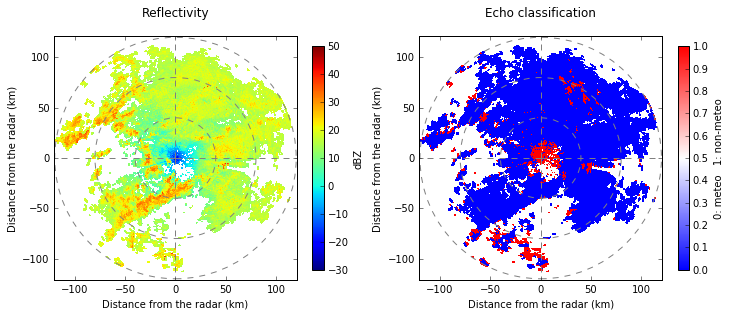

In [11]:
# Plot side by side for easier comparison

pl.figure(figsize=(12,5))
pl.subplot(121)
ax,pm = wrl.vis.plot_ppi(np.ma.masked_invalid(data_z_RF), r=attrs_z_RF['r']/1000.,
                         cmap=pl.cm.jet, vmin=-30, vmax=50)
wrl.vis.plot_ppi_crosshair(site=(0,0),ranges=[40,80,120])
cb = pl.colorbar(pm, shrink=0.8)
cb.set_label('dBZ')
pl.xlim((-121,121))
pl.ylim((-121,121))
pl.xlabel('Distance from the radar (km)')
pl.ylabel('Distance from the radar (km)')
pl.title('Reflectivity\n')

pl.subplot(122)
ax,pm = wrl.vis.plot_ppi(np.ma.masked_invalid(clutter_masked_RF), r=attrs_z_RF['r']/1000., 
                         cmap=pl.cm.bwr)
wrl.vis.plot_ppi_crosshair(site=(0,0),ranges=[40,80,120])
cb = pl.colorbar(pm, shrink=0.8)
cb.set_label('0: meteo   1: non-meteo')
pl.xlim((-121,121))
pl.ylim((-121,121))
pl.xlabel('Distance from the radar (km)')
pl.ylabel('Distance from the radar (km)')
pl.title('Echo classification\n')